In [ ]:
pip install openai

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

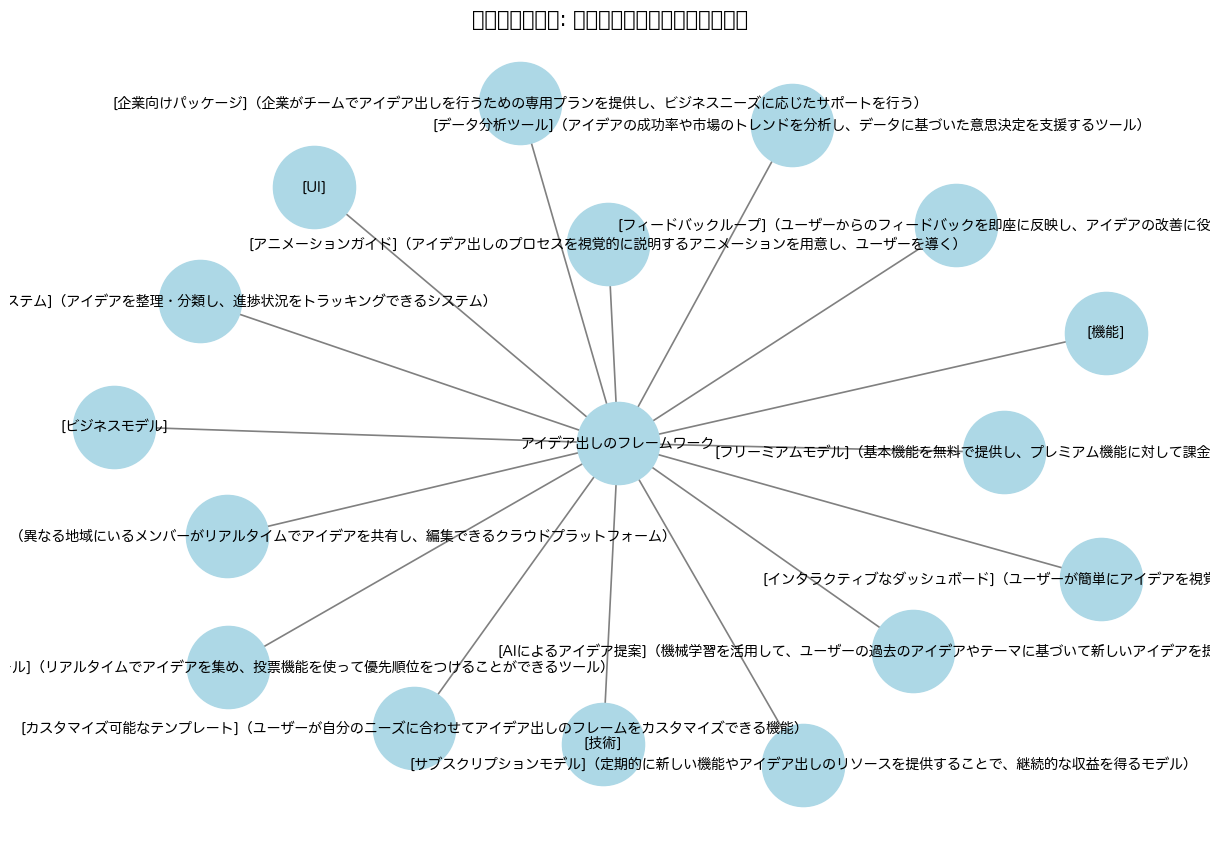

In [7]:
import openai
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join('.env')
load_dotenv(dotenv_path)

API_KEY = os.environ.get("API_KEY")

# ✅ OpenAI クライアント作成
client = openai.Client(api_key=API_KEY)

# ✅ マインドマップ生成プロンプト
mindmap_prompt = """
あなたは創造的な発想を支援するAIです。
以下のルールに従って、アイデアをマインドマップ形式で提案してください。

【テーマ】{user_idea}

1. 主要カテゴリを **4~5個** 提案してください。（例: 機能, UI, 技術, ビジネスモデル など）
2. 各カテゴリについて、 **3~5個のサブアイデア** を展開してください。
3. サブアイデアには、 **具体的な説明を1文追加** してください。

出力形式:
- {user_idea}
  - [カテゴリ1]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
  - [カテゴリ2]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
"""

# ✅ アイデアのテーマをユーザー入力
user_idea = input("💡 アイデアのテーマを入力してください: ")

# ✅ GPT にアイデア生成を依頼
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "あなたはアイデア発想を支援するAIです。"},
        {"role": "user", "content": mindmap_prompt.replace("{user_idea}", user_idea)}
    ],
    max_tokens=700,
    temperature=0.7
)

# ✅ 出力結果をパース
generated_text = response.choices[0].message.content.strip()
lines = generated_text.split("\n")

# ✅ NetworkXでマインドマップ作成
G = nx.Graph()
root = user_idea  # ユーザーの入力をルートノードにする
G.add_node(root)

parent = root
for line in lines[1:]:
    line = line.strip()
    if line.startswith("- "):
        parent = line.strip("- ")
        G.add_edge(root, parent)
    elif line.startswith("  - "):
        child = line.strip("  - ")
        G.add_edge(parent, child)

# ✅ 位置を調整して、ノード同士の距離を広げる
pos = nx.spring_layout(G, seed=42, k=1.2)  # `k` を大きくすると距離が広がる

# ✅ 日本語フォントを適用
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
# plt.rcParams['font.family'] = "IPAexGothic"

# ✅ マインドマップの描画
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=3500, font_size=10, width=1.2)  # ノードサイズとフォントサイズを調整
plt.title(f"マインドマップ: {user_idea}", fontsize=15)
plt.show()


In [8]:
print(generated_text)

- アイデア出しのフレームワーク
  - [機能]
    - [ブレインストーミングツール]（リアルタイムでアイデアを集め、投票機能を使って優先順位をつけることができるツール）
    - [アイデア管理システム]（アイデアを整理・分類し、進捗状況をトラッキングできるシステム）
    - [フィードバックループ]（ユーザーからのフィードバックを即座に反映し、アイデアの改善に役立てる機能）
  
  - [UI]
    - [インタラクティブなダッシュボード]（ユーザーが簡単にアイデアを視覚化し、管理できるダッシュボード）
    - [カスタマイズ可能なテンプレート]（ユーザーが自分のニーズに合わせてアイデア出しのフレームをカスタマイズできる機能）
    - [アニメーションガイド]（アイデア出しのプロセスを視覚的に説明するアニメーションを用意し、ユーザーを導く）

  - [技術]
    - [AIによるアイデア提案]（機械学習を活用して、ユーザーの過去のアイデアやテーマに基づいて新しいアイデアを提案するシステム）
    - [クラウドベースのコラボレーション]（異なる地域にいるメンバーがリアルタイムでアイデアを共有し、編集できるクラウドプラットフォーム）
    - [データ分析ツール]（アイデアの成功率や市場のトレンドを分析し、データに基づいた意思決定を支援するツール）

  - [ビジネスモデル]
    - [サブスクリプションモデル]（定期的に新しい機能やアイデア出しのリソースを提供することで、継続的な収益を得るモデル）
    - [フリーミアムモデル]（基本機能を無料で提供し、プレミアム機能に対して課金するモデル）
    - [企業向けパッケージ]（企業がチームでアイデア出しを行うための専用プランを提供し、ビジネスニーズに応じたサポートを行う）


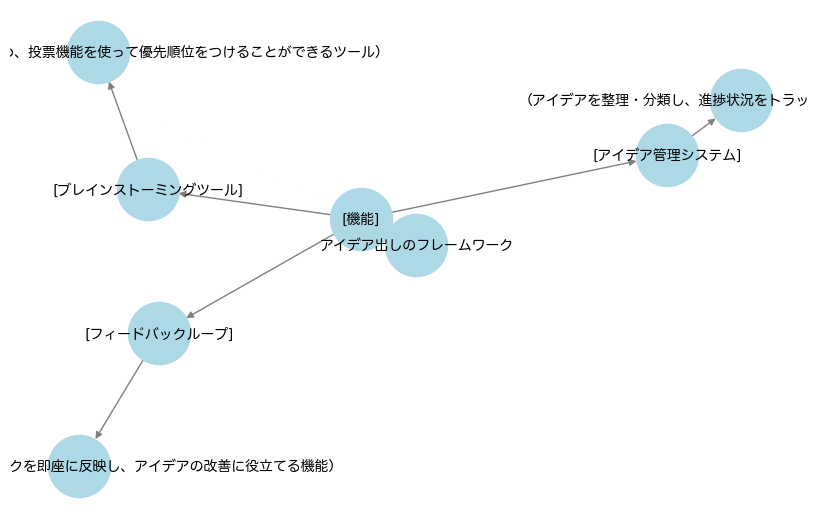

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from textwrap import dedent

# Markdownの箇条書きを用意
md_text = dedent("""
- アイデア出しのフレームワーク
  - [機能]
    - [ブレインストーミングツール]（リアルタイムでアイデアを集め、投票機能を使って優先順位をつけることができるツール）
    - [アイデア管理システム]アイデアを整理・分類し、進捗状況をトラッキングできるシステム）
    - [フィードバックループ]（ユーザーからのフィードバックを即座に反映し、アイデアの改善に役立てる機能）
  
  - [UI]
    - [インタラクティブなダッシュボード]（ユーザーが簡単にアイデアを視覚化し、管理できるダッシュボード）
    - [カスタマイズ可能なテンプレート]（ユーザーが自分のニーズに合わせてアイデア出しのフレームをカスタマイズできる機能）
    - [アニメーションガイド]（アイデア出しのプロセスを視覚的に説明するアニメーションを用意し、ユーザーを導く）

  - [技術]
    - [AIによるアイデア提案]（機械学習を活用して、ユーザーの過去のアイデアやテーマに基づいて新しいアイデアを提案するシステム）
    - [クラウドベースのコラボレーション]（異なる地域にいるメンバーがリアルタイムでアイデアを共有し、編集できるクラウドプラットフォーム）
    - [データ分析ツール]（アイデアの成功率や市場のトレンドを分析し、データに基づいた意思決定を支援するツール）

  - [ビジネスモデル]
    - [サブスクリプションモデル]（定期的に新しい機能やアイデア出しのリソースを提供することで、継続的な収益を得るモデル）
    - [フリーミアムモデル]（基本機能を無料で提供し、プレミアム機能に対して課金するモデル）
    - [企業向けパッケージ]（企業がチームでアイデア出しを行うための専用プランを提供し、ビジネスニーズに応じたサポートを行う）
""")

# Markdownの解析（単純なインデント解析）
def parse_markdown(md_text):
    tree = {}
    stack = [(tree, -1)]  # (現在のノード, インデントレベル)
    
    for line in md_text.strip().split("\n"):
        indent = len(line) - len(line.lstrip())  # インデントの長さ
        text = line.strip("- ").strip()  # '- 'を除去
        node = {}

        while stack and stack[-1][1] >= indent:
            stack.pop()  # インデントレベルが合わなくなるまで戻る

        parent = stack[-1][0]  # 現在の親ノード
        parent[text] = node  # 子ノードを追加
        stack.append((node, indent))

    return tree

# Markdownをツリー構造に変換
tree = parse_markdown(md_text)

# NetworkXでグラフ作成
def add_nodes_edges(graph, parent, children):
    for child, sub_tree in children.items():
        graph.add_edge(parent, child)
        add_nodes_edges(graph, child, sub_tree)

G = nx.DiGraph()
root = list(tree.keys())[0]
G.add_node(root)
add_nodes_edges(G, root, tree[root])

# グラフ描画
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)  # レイアウト計算
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()


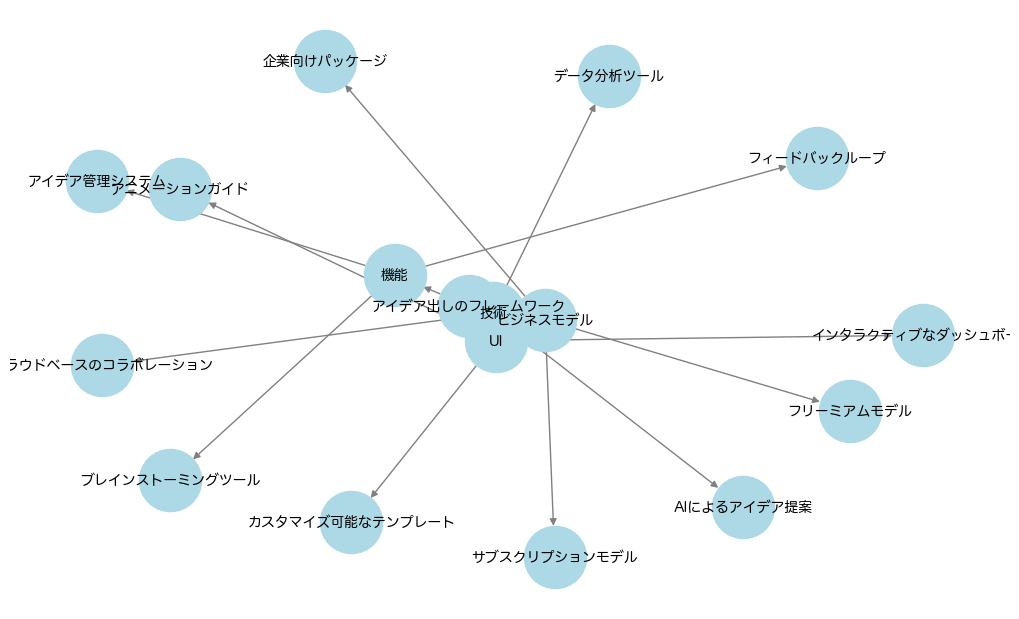

In [25]:
import networkx as nx
import matplotlib.pyplot as plt


idea_framework = {
    "アイデア出しのフレームワーク": {
        "機能": {
            "ブレインストーミングツール": "リアルタイムでアイデアを集め、投票機能を使って優先順位をつけることができるツール",
            "アイデア管理システム": "アイデアを整理・分類し、進捗状況をトラッキングできるシステム",
            "フィードバックループ": "ユーザーからのフィードバックを即座に反映し、アイデアの改善に役立てる機能",
        },
        "UI": {
            "インタラクティブなダッシュボード": "ユーザーが簡単にアイデアを視覚化し、管理できるダッシュボード",
            "カスタマイズ可能なテンプレート": "ユーザーが自分のニーズに合わせてアイデア出しのフレームをカスタマイズできる機能",
            "アニメーションガイド": "アイデア出しのプロセスを視覚的に説明するアニメーションを用意し、ユーザーを導く",
        },
        "技術": {
            "AIによるアイデア提案": "機械学習を活用して、ユーザーの過去のアイデアやテーマに基づいて新しいアイデアを提案するシステム",
            "クラウドベースのコラボレーション": "異なる地域にいるメンバーがリアルタイムでアイデアを共有し、編集できるクラウドプラットフォーム",
            "データ分析ツール": "アイデアの成功率や市場のトレンドを分析し、データに基づいた意思決定を支援するツール",
        },
        "ビジネスモデル": {
            "サブスクリプションモデル": "定期的に新しい機能やアイデア出しのリソースを提供することで、継続的な収益を得るモデル",
            "フリーミアムモデル": "基本機能を無料で提供し、プレミアム機能に対して課金するモデル",
            "企業向けパッケージ": "企業がチームでアイデア出しを行うための専用プランを提供し、ビジネスニーズに応じたサポートを行う",
        }
    }
}


# グラフ作成関数
def add_nodes_edges(graph, parent, children):
    """辞書形式のツリーをNetworkXのグラフに変換"""
    for child, sub_tree in children.items():
        graph.add_edge(parent, child)
        if isinstance(sub_tree, dict):
            add_nodes_edges(graph, child, sub_tree)

# グラフを作成
G = nx.DiGraph()
root = list(idea_framework.keys())[0]
G.add_node(root)
add_nodes_edges(G, root, idea_framework[root])

# グラフ描画
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()
